# Online Retail Customer Segmentation
<hr style="border: 2px solid #000000;">

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import os

---

# Table of Contents
1. [Introduction](#I.-Introduction)
2. [RFM Analysis](#II.-RFM-Analysis)
3. [K Means-Clustering](#IV.-K-Means-Clustering)
4. [Post-Segmentation Analysis](#V.-Post-Segmentation-Analysis)
5. [Conclusion](#VI-Conclusion)

---

## Introduction

Welcome to the "Online Retail Customer Segmentation" notebook, dedicated to exploring the UCI Online Retail Data. This phase marks a pivotal juncture in the analytical journey, poised to unveil latent patterns and customer segments within the dataset. The richness of the data necessitates a thorough exploration to discern intricate behaviors, identify high-value customers, and tailor strategies for optimal business outcomes.

In the pursuit of unraveling the narrative within the data, this notebook employs a comprehensive approach, amalgamating RFM analysis and K-Means clustering. By scrutinizing Recency, Frequency, and Monetary Value, we aim to delineate distinct customer segments, each with its own unique characteristics and potential business implications.

This data set which contains transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail. Source: http://archive.ics.uci.edu/ml/datasets/Online+Retail

The dataset underwent a thorough cleaning process in the Online Retail Data Cleaning Notebook, where various measures were implemented to enhance its quality and usability. Additionally, several key features were incorporated to facilitate a more insightful and comprehensive analysis in subsequent phases. This preparatory step ensures that the dataset is primed for a detailed exploration of customer behavior, product dynamics, time trends, and country-specific insights during the Exploratory Data Analysis (EDA) phase.

Each key feature in the dataset represents a unique transaction, and understanding its structure is essential for subsequent data analysis and cleaning.

Examination of the fundamental features that characterize each transaction reveals:

- **InvoiceNo:** A 6-digit integral number serving as a unique identifier for each transaction. 
- **StockCode:** A 5-digit integral number assigned to each distinct product, uniquely identifying items in the dataset.
- **Description:** The nominal field that holds the product or item name.
- **Quantity:** Numeric field representing the quantities of each product per transaction.
- **InvoiceDate:** Numeric field indicating the date and time when a transaction occurred.
- **UnitPrice:** Numeric field denoting the unit price of each product in sterling (£).
- **CustomerID:** A 5-digit integral number serving as a unique identifier for each customer.
- **Country:** Nominal field indicating the country where a customer resides.
- **TotalPrice:** This column represents the total monetary value of each transaction, calculated by multiplying the quantity of items purchased by their respective unit prices.
- **Hour:** Specific hour of the day when each transaction occurred, extracted from the 'InvoiceDate' timestamp.
- **Day:** Day of the week (0 for Monday, 1 for Tuesday, and so on) when each transaction took place, derived from the 'InvoiceDate' timestamp.
- **Month:** Numerical representation of the month when each transaction occurred, extracted from the 'InvoiceDate' timestamp.
- **IsRepeatCustomer:** Binary flag, indicating whether a customer has made more than one purchase ('True') or only a single purchase ('False').

### Overview of Dataset Characteristics

In [2]:
# Set the working directory to the 'Online-Retail-Data-Analysis' folder
os.chdir(os.path.abspath('..'))

# Define the relative path to the data folder and the CSV file
data_relative_path = os.path.join('Data', 'CleanedData.csv')

# Construct the absolute path to the CSV file
data_path = os.path.join(os.getcwd(), data_relative_path)

# Read the CSV file into a Pandas DataFrame
cleaned_data = pd.read_csv(data_path, encoding='latin1')

cleaned_data.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Hour,Day,Month,IsRepeatCustomer
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,8,2,12,True
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,8,2,12,True
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,8,2,12,True
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,8,2,12,True
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,8,2,12,True


In [3]:
#view data information
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392692 entries, 0 to 392691
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   InvoiceNo         392692 non-null  int64  
 1   StockCode         392692 non-null  object 
 2   Description       392692 non-null  object 
 3   Quantity          392692 non-null  int64  
 4   InvoiceDate       392692 non-null  object 
 5   UnitPrice         392692 non-null  float64
 6   CustomerID        392692 non-null  float64
 7   Country           392692 non-null  object 
 8   TotalPrice        392692 non-null  float64
 9   Hour              392692 non-null  int64  
 10  Day               392692 non-null  int64  
 11  Month             392692 non-null  int64  
 12  IsRepeatCustomer  392692 non-null  bool   
dtypes: bool(1), float64(3), int64(5), object(4)
memory usage: 36.3+ MB


In [4]:
#quantitative data
cleaned_data.describe()

,InvoiceNo,Quantity,UnitPrice,CustomerID,TotalPrice,Hour,Day,Month
count,392692.000000,392692.000000,392692.000000,392692.000000,392692.000000,392692.000000,392692.000000,392692.000000
mean,560590.875047,13.119702,3.125914,15287.843865,22.631500,12.721532,2.606911,7.601871
std,13087.063759,180.492832,22.241836,1713.539549,311.099224,2.276661,1.923929,3.415015
min,536365.000000,1.000000,0.001000,12346.000000,0.001000,6.000000,0.000000,1.000000
25%,549234.000000,2.000000,1.250000,13955.000000,4.950000,11.000000,1.000000,5.000000
50%,561874.000000,6.000000,1.950000,15150.000000,12.450000,13.000000,2.000000,8.000000
75%,572061.000000,12.000000,3.750000,16791.000000,19.800000,14.000000,4.000000,11.000000
max,581587.000000,80995.000000,8142.750000,18287.000000,168469.600000,20.000000,6.000000,12.000000


---

## RFM Analysis

To gain a deeper understanding of customer behavior and customize marketing strategies, a Customer Segmentation analysis is carried out using RFM (Recency, Frequency, Monetary) metrics. The RFM analysis involves grouping the data by 'CustomerID' and computing essential metrics like Recency, Frequency, and Monetary Value. 

In [5]:
# Convert 'InvoiceDate' to datetime format
cleaned_data['InvoiceDate'] = pd.to_datetime(cleaned_data['InvoiceDate'])

# RFM Analysis
rfm_df = cleaned_data.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (cleaned_data['InvoiceDate'].max() - x.max()).days,  # Recency
    'InvoiceNo': 'nunique',  # Frequency
    'TotalPrice': 'sum'  # Monetary Value
}).rename(columns={
    'InvoiceDate': 'Recency',
    'InvoiceNo': 'Frequency',
    'TotalPrice': 'MonetaryValue'
}).reset_index()

# Scaling RFM values
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_df[['Recency', 'Frequency', 'MonetaryValue']])


### Checking Skewness

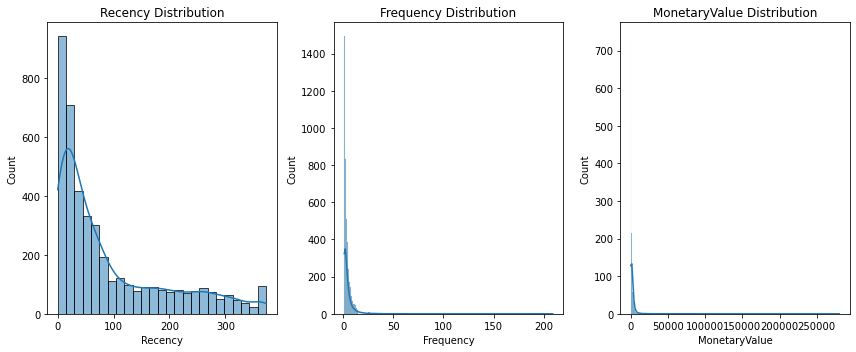

In [6]:
# Plotting distributions
plt.figure(figsize=(12, 5))
plt.subplot(1, 3, 1)
sns.histplot(rfm_df['Recency'], kde=True)
plt.title('Recency Distribution')

plt.subplot(1, 3, 2)
sns.histplot(rfm_df['Frequency'], kde=True)
plt.title('Frequency Distribution')

plt.subplot(1, 3, 3)
sns.histplot(rfm_df['MonetaryValue'], kde=True)
plt.title('MonetaryValue Distribution')

plt.tight_layout()
plt.show()

When the data is highly left-skewed (meaning a long tail on the left side of the distribution), using a logarithmic transformation can be beneficial. The logarithmic transformation, particularly the natural logarithm (base e), can help to reduce the impact of extreme values and make the distribution more symmetric.

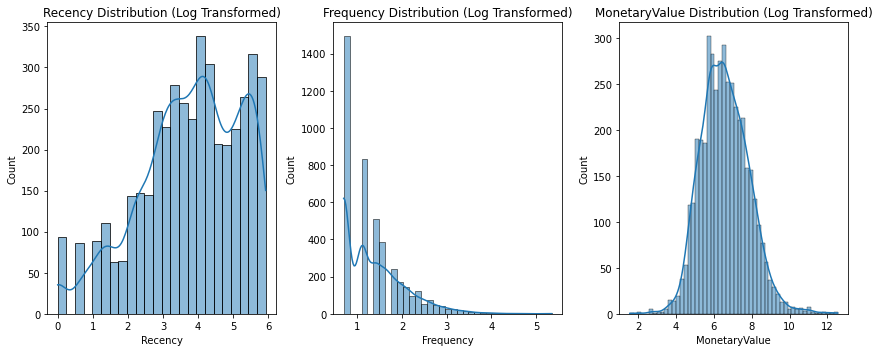

In [7]:
# Apply log transformation
rfm_df[['Recency', 'Frequency', 'MonetaryValue']] = np.log1p(rfm_df[['Recency', 'Frequency', 'MonetaryValue']])

# Plotting distributions
plt.figure(figsize=(12, 5))
plt.subplot(1, 3, 1)
sns.histplot(rfm_df['Recency'], kde=True)
plt.title('Recency Distribution (Log Transformed)')

plt.subplot(1, 3, 2)
sns.histplot(rfm_df['Frequency'], kde=True)
plt.title('Frequency Distribution (Log Transformed)')

plt.subplot(1, 3, 3)
sns.histplot(rfm_df['MonetaryValue'], kde=True)
plt.title('MonetaryValue Distribution (Log Transformed)')

plt.tight_layout()
plt.show()

## K Means Clustering

The Elbow method is employed to visualize the within-cluster sum of squares (WCSS) for varying numbers of clusters (k) in k-means clustering, aiding in pinpointing the optimal value for k. The plot suggests an optimal k value of 3 or 4, and I have opted to use 4 for further analysis.

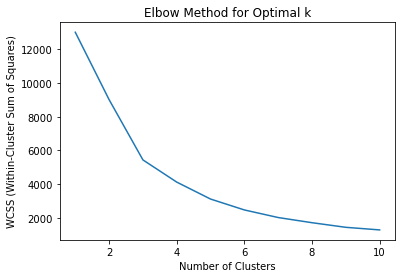

In [8]:
# Elbow Method Plot
wcss = [KMeans(n_clusters=i, init='k-means++', random_state=7).fit(rfm_scaled).inertia_ for i in range(1, 11)]
plt.plot(range(1, 11), wcss)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.title('Elbow Method for Optimal k')
plt.show()

Employing k-means clustering is crucial for customer segmentation and strategic optimization. K-means clustering, an unsupervised machine learning method, categorizes customers based on RFM features. This segmentation enables targeted marketing, tailoring campaigns to specific customer behaviors and preferences. By automating the segmentation process, k-means clustering ensures adaptability to evolving customer dynamics. This approach enhances resource allocation, customer engagement, and satisfaction, ultimately contributing to long-term success through refined product offerings and improved experiences.

The clusters generated reveal the presence of four distinct groups. A deeper exploration of these groups opens avenues for more in-depth analysis and insights into customer behavior and characteristics within each cluster.

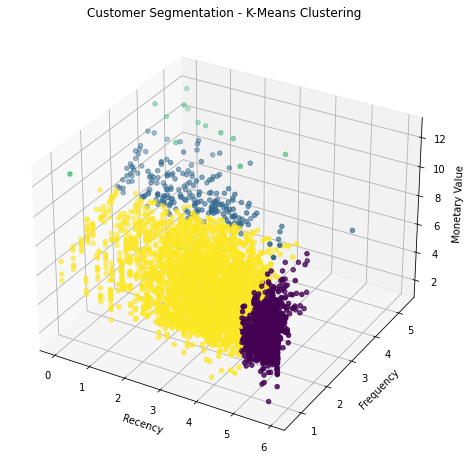

In [9]:
# K-Means Clustering
k = 4
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
rfm_df['Cluster'] = kmeans.fit_predict(rfm_scaled)

# Cluster Summary
cluster_summary = rfm_df.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'MonetaryValue': 'mean',
    'CustomerID': 'count'
}).rename(columns={'CustomerID': 'Count'})

# Visualization
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(rfm_df['Recency'], rfm_df['Frequency'], rfm_df['MonetaryValue'], c=rfm_df['Cluster'], cmap='viridis')
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary Value')
ax.set_title('Customer Segmentation - K-Means Clustering')
plt.show()

## Post Segmentation Analysis

          Recency                               Frequency                      \
             mean       min       max       std      mean       min       max   
Cluster                                                                         
0        5.479828  4.969813  5.924256  0.269657  0.880332  0.693147  2.564949   
1        1.844422  0.000000  5.918894  1.213163  3.040813  0.693147  4.543295   
2        1.139012  0.000000  3.663562  1.279875  4.053474  1.098612  5.347108   
3        3.315860  0.000000  5.093750  1.128671  1.378741  0.693147  2.708050   

                  MonetaryValue                                 Count  
              std          mean        min        max       std count  
Cluster                                                                
0        0.306091      5.741313   1.558145   9.196775  0.891641  1062  
1        0.440475      9.090900   7.168148  11.253955  0.765155   211  
2        1.098197     11.556485  10.405904  12.543284  0.676760    13  


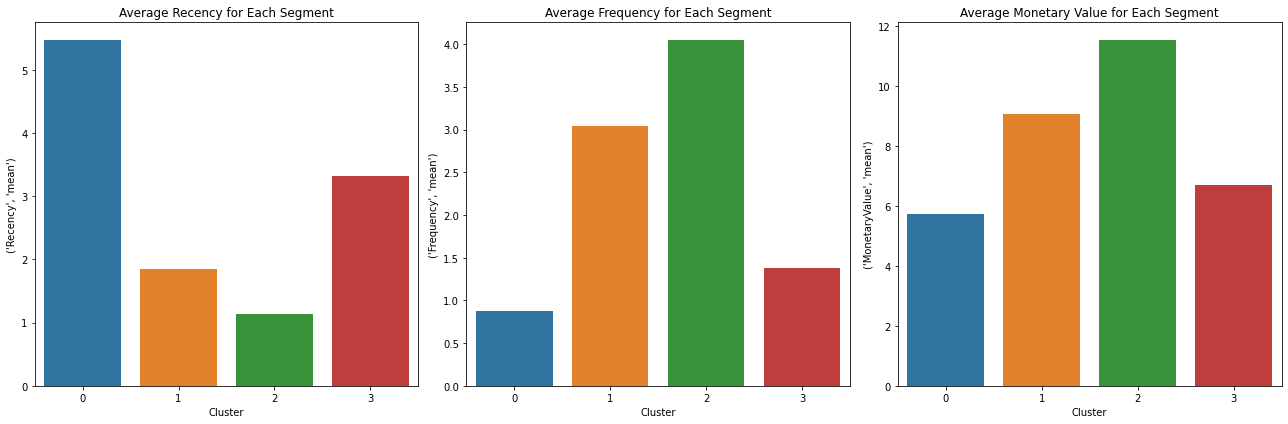

In [10]:
# Assuming 'rfm_df' contains the results of the K-Means clustering
# 'Cluster' column indicates the cluster assignment for each customer

# Analyze characteristics of each segment
segment_analysis = rfm_df.groupby('Cluster').agg({
    'Recency': ['mean', 'min', 'max', 'std'],
    'Frequency': ['mean', 'min', 'max', 'std'],
    'MonetaryValue': ['mean', 'min', 'max', 'std'],
    'CustomerID': 'count'
}).rename(columns={'CustomerID': 'Count'})

# Display the results
print(segment_analysis)

# Visualize characteristics of each segment
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# Recency
sns.barplot(x=segment_analysis.index, y=('Recency', 'mean'), data=segment_analysis, ax=axes[0])
axes[0].set_title('Average Recency for Each Segment')

# Frequency
sns.barplot(x=segment_analysis.index, y=('Frequency', 'mean'), data=segment_analysis, ax=axes[1])
axes[1].set_title('Average Frequency for Each Segment')

# MonetaryValue
sns.barplot(x=segment_analysis.index, y=('MonetaryValue', 'mean'), data=segment_analysis, ax=axes[2])
axes[2].set_title('Average Monetary Value for Each Segment')

plt.tight_layout()
plt.show()


In this customer segmentation analysis, we have utilized K-Means clustering to categorize customers into distinct clusters based on their Recency, Frequency, and Monetary Value (RFM) metrics. The analysis aims to provide actionable insights into customer behavior and preferences, allowing for targeted marketing strategies and personalized approaches. The clusters have been labeled and interpreted, shedding light on the characteristics of each segment. As we delve into the details of each cluster, including recency, frequency, and monetary metrics, we gain valuable insights into the engagement and spending patterns of our customer base. The subsequent sections highlight specific clusters, offer general observations, and propose actionable strategies to enhance customer engagement and optimize business outcomes.


### Cluster 0: "Inactive/Low-Spending Customers"

- **Recency:** Mean of 5.48 days, indicating infrequent recent purchases.
- **Frequency:** Low average frequency (0.88), suggesting minimal purchasing activity.
- **MonetaryValue:** Relatively low mean monetary value (5.74), indicating lower spending.

### Cluster 1: "Active/Regular Customers"

- **Recency:** Very low mean recency of 1.84 days, suggesting recent and regular activity.
- **Frequency:** Higher average frequency (3.04) indicates frequent and regular purchases.
- **MonetaryValue:** Significant mean monetary value (9.09), indicating higher spending.

### Cluster 2: "High-Value Customers"

- **Recency:** Very low mean recency of 1.14 days, indicating recent and frequent activity.
- **Frequency:** High average frequency (4.05) indicates frequent and substantial purchases.
- **MonetaryValue:** Very high mean monetary value (11.56), indicating high-value customers.

### Cluster 3: "Medium-Value Customers"

- **Recency:** Mean recency of 3.32 days, indicating some recent activity.
- **Frequency:** Moderate average frequency (1.38) suggests moderate purchase frequency.
- **MonetaryValue:** Moderate mean monetary value (6.69), indicating medium-level spending.

#### General Observations:

- Clusters 1 and 2 are particularly interesting as they represent active and high-value customers, respectively.
- Cluster 0 represents less active or low-spending customers.
- Cluster 3 represents customers with moderate activity and spending.

#### Actionable Insights:

- Consider targeted marketing strategies for Clusters 1 and 2 to retain and possibly increase their engagement.
- For Cluster 0, consider re-engagement strategies to increase their activity and spending.
- Monitor and analyze customer behavior within each cluster for ongoing optimization.


## Conclusion